In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import math
import numpy as np

In [98]:
sns.set_theme(style="darkgrid")
fmri = sns.load_dataset("fmri")
print(fmri)


     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]


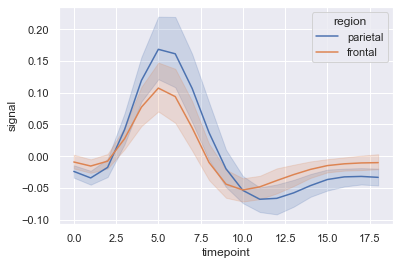

In [99]:

sns.lineplot(x="timepoint", y="signal", hue="region", data=fmri)
#sns.lineplot(x="complexity", y="samples", hue="algorithm", data=fmri)
plt.show()

In [100]:
df = pd.read_csv("evaluation/maze_samples_reward_b_8_complexity_36.csv", index_col=False)
print(df)

      complexity algorithm  samples    reward  b
0             36    LaMCTS        6  2.000000  8
1             36    LaMCTS       12  2.000000  8
2             36    LaMCTS       18  2.000000  8
3             36    LaMCTS       24  2.000000  8
4             36    LaMCTS       30  2.000000  8
...          ...       ...      ...       ... ..
1746          36        A*       62  0.341593  8
1747          36        A*       63  0.284325  8
1748          36        A*       64  0.416305  8
1749          36        A*       65  0.369358  8
1750          36        A*       66  0.305281  8

[1751 rows x 5 columns]


In [101]:
df = df[df.algorithm != 'MCTS']
df = df[df.algorithm != 'A*']
print(df)

      complexity algorithm  samples  reward  b
0             36    LaMCTS        6     2.0  8
1             36    LaMCTS       12     2.0  8
2             36    LaMCTS       18     2.0  8
3             36    LaMCTS       24     2.0  8
4             36    LaMCTS       30     2.0  8
...          ...       ...      ...     ... ..
1680          36      LAP3       45     1.0  8
1681          36      LAP3       50    10.0  8
1682          36      LAP3       55     2.0  8
1683          36      LAP3       60     3.0  8
1684          36      LAP3       65     4.0  8

[1685 rows x 5 columns]


In [102]:
def calculate_mean_std(samples, reward):
    # Initialize variables
    total_reward = 0
    total_samples = 0

    # Iterate over each row in the CSV file
    for i in range(len(reward)):

        # Update the total reward and total samples
        total_reward = total_reward+ reward.iloc[i]
        total_samples =total_samples+1

    # Calculate the mean and standard deviation
    mean_reward = total_reward/total_samples #total_reward / total_samples


    return mean_reward, 2.25

samples:  10
Mean reward: 2.1146
samples:  15
Mean reward: 2.36
samples:  20
Mean reward: 2.8462
samples:  25
Mean reward: 3.1538
samples:  30
Mean reward: 1.7554
samples:  35
Mean reward: 4.7949
samples:  40
Mean reward: 2.8718
samples:  45
Mean reward: 2.9231
samples:  50
Mean reward: 3.1538
samples:  55
Mean reward: 5.0513
samples:  60
Mean reward: 2.2536
samples:  65
Mean reward: 4.4615


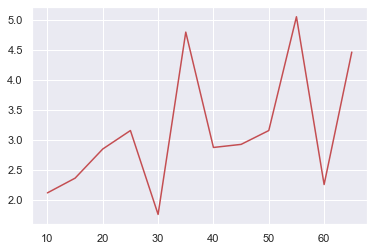

In [105]:
mean_list = []
sample_list = []
quantil_95_list = []
quantil_05_list = []
for i in range(20,70,5):
    
    df_20 = df[df.samples == i]
    samples = df_20["samples"]
    reward = df_20["reward"]

    #mean_reward, std_deviation = calculate_mean_std(samples, reward)
    mean_reward = sum(reward)/len(reward)
    mean_list.append(mean_reward)
    sample_list.append(i)
    print("samples: ", i)
    print("Mean reward:", round(mean_reward,4))

plt.plot(sample_list, mean_list, 'r')
plt.show()
